In [7]:
from pandas_datareader import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2014-01-01'
end_date = '2018-01-01'
goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)

In [6]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

goog_data_signal['positions'] = goog_data_signal['signal'].diff()

In [9]:
goog_data_signal

price  daily_difference  signal  positions
Date                                                        
2014-01-02   554.481689               NaN     0.0        NaN
2014-01-03   550.436829         -4.044861     0.0        0.0
2014-01-06   556.573853          6.137024     1.0        1.0
2014-01-07   567.303589         10.729736     1.0        0.0
2014-01-08   568.484192          1.180603     1.0        0.0
...                 ...               ...     ...        ...
2017-12-22  1060.119995         -3.510010     0.0        0.0
2017-12-26  1056.739990         -3.380005     0.0        0.0
2017-12-27  1049.369995         -7.369995     0.0        0.0
2017-12-28  1048.140015         -1.229980     0.0        0.0
2017-12-29  1046.400024         -1.739990     0.0        0.0

[1007 rows x 4 columns]

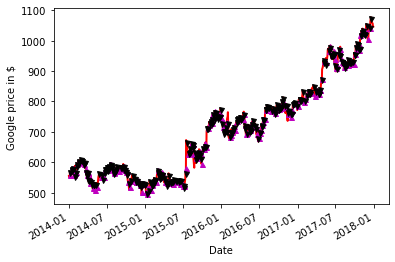

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

In [ ]:
initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

In [ ]:
positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [ ]:
portfolio

In [ ]:
portfolio.plot()
plt.show()

In [11]:
positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [12]:
portfolio

positions         cash        total
Date                                            
2014-01-02    0.000000          NaN          NaN
2014-01-03    0.000000  1000.000000  1000.000000
2014-01-06  556.573853   443.426147  1000.000000
2014-01-07  567.303589   443.426147  1010.729736
2014-01-08  568.484192   443.426147  1011.910339
...                ...          ...          ...
2017-12-22    0.000000  1253.277405  1253.277405
2017-12-26    0.000000  1253.277405  1253.277405
2017-12-27    0.000000  1253.277405  1253.277405
2017-12-28    0.000000  1253.277405  1253.277405
2017-12-29    0.000000  1253.277405  1253.277405

[1007 rows x 3 columns]

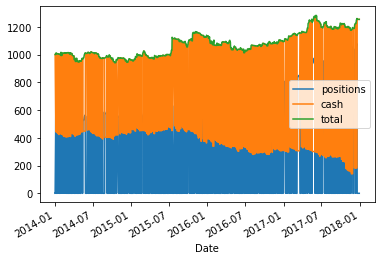

In [13]:
portfolio.plot()
plt.show()